In [1]:
from utils.create_antenna_for_scattering import strip_gmsh
from utils.gmsh_function import *
from src.scattering_algorithm.scattering_algorithm import *
from efield.efield2 import radiation_intensity_distribution_over_sphere_surface
from efield.efield3 import antenna_directivity_pattern

In [ ]:
def process_antenna(filename):
    base_name = os.path.splitext(os.path.basename(filename))[0]
    print(f"Processing antenna {base_name}")

In [ ]:
# Strip dimensions
Longueur = 0.05  # Length in X
largeur = 2  # Width in Y
mesh_size = 0.05
mesh_name = "strip_gmsh.msh"
save_mesh_folder = 'data/gmsh_files/'

In [4]:
strip_msh_gmsh = strip_gmsh(Longueur, largeur, mesh_name, save_mesh_folder, mesh_size)
open_mesh(strip_msh_gmsh)

strip_gmsh.msh saved in data/gmsh_files/strip_gmsh.msh successfully


In [5]:
strip_mat_gmsh = 'data/antennas_mesh/strip_gmsh.mat'
extract_msh_to_mat(strip_msh_gmsh, strip_mat_gmsh)

In [6]:
wave_incident_direction = np.array([0, 0, -1])
polarization=np.array([0, 1, 0])

In [ ]:
process_antenna(strip_mat_gmsh)
print("\n")

start_time = time.time()

scattering_algorithm(strip_mat_gmsh, 75e6, wave_incident_direction, polarization)

elapsed_time = time.time() - start_time
print(f"\nElapsed time for processing the studied antenna: {elapsed_time:.6f} seconds")
print('\n')

Traitement de l'antenne strip_gmsh


length of antenna strip_gmsh = 0.05 meter
width of antenna strip_gmsh = 2.0 meter
height of antenna strip_gmsh = 0.0 meter


Nombre d'elements de maillage (edges) = 99


Sauvegarde du fichier : strip_gmsh_current.mat effectué avec succès !

Fréquence de l'onde incidente : 75000000.0 Hz

strip_gmsh antenna surface current in receiving mode view is successfully created at frequency 75000000.0 Hz



Temps écoulé pour le traitement de l'antenne étudiée : 0.149290 secondes




Calculating radiation intensity distribution over sphere surface...

Frequency = 75000000.0 Hz
Longueur d'onde lambda = 3.9966980530747898 m

Total Power :  0.008219
Gain Linear :  1.595328
Gain Logarithmic :  2.028500 dB
Data saved successfully to data/antennas_gain_power/strip_gmsh_gain_power.mat


Generating antenna directivity pattern...
Data loaded from data/antennas_gain_power/strip_gmsh_gain_power.mat


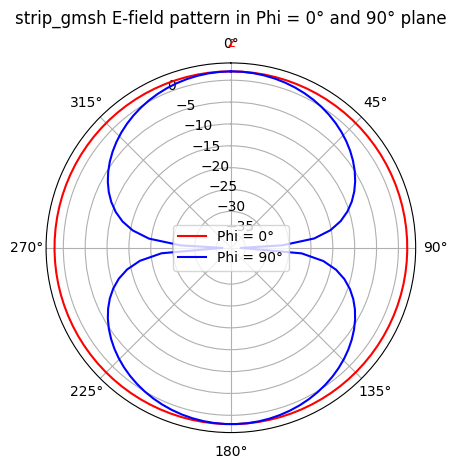

In [ ]:
strip_mesh2 = 'data/antennas_mesh2/strip_gmsh_mesh2.mat'
strip_current = 'data/antennas_current/strip_gmsh_current.mat'
strip_gain_power = 'data/antennas_gain_power/strip_gmsh_gain_power.mat'
filename_sphere_dense = '../../data/sphere_mesh/sphere_dense.mat'

# Step 2: Radiation intensity distribution over a sphere
print("Calculating radiation intensity distribution over sphere surface...")
radiation_intensity_distribution_over_sphere_surface(strip_mesh2, strip_current, filename_sphere_dense, scattering=True)

# Step 3: Generation of the directivity pattern
print("Generating antenna directivity pattern...")
antenna_directivity_pattern(strip_mesh2, strip_current, strip_gain_power, scattering=True)